In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
%matplotlib inline
plt.style.use('dark_background')
# plt.style.available

### Dropping the original column for quality. Setting Quality = 1 for good and = 0 for not good quality

In [2]:
df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
for x in df.index:
    if df.loc[x, 'quality'] >= 7:
        df.loc[x, 'Quality'] = 1
    else:
        df.loc[x, 'Quality'] = 0

df.drop('quality', axis=1, inplace=True)
# df.dropna(inplace=True)
print(df.to_string())

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  sulphates    alcohol  Quality
0               7.4             0.700         0.00            1.90      0.076                 11.0                  34.0  0.99780  3.51       0.56   9.400000      0.0
1               7.8             0.880         0.00            2.60      0.098                 25.0                  67.0  0.99680  3.20       0.68   9.800000      0.0
2               7.8             0.760         0.04            2.30      0.092                 15.0                  54.0  0.99700  3.26       0.65   9.800000      0.0
3              11.2             0.280         0.56            1.90      0.075                 17.0                  60.0  0.99800  3.16       0.58   9.800000      0.0
4               7.4             0.700         0.00            1.90      0.076                 11.0                  34.0  0.99780  3.51       0.56   9.400000      0.

### Normalising the data through min-max scaling

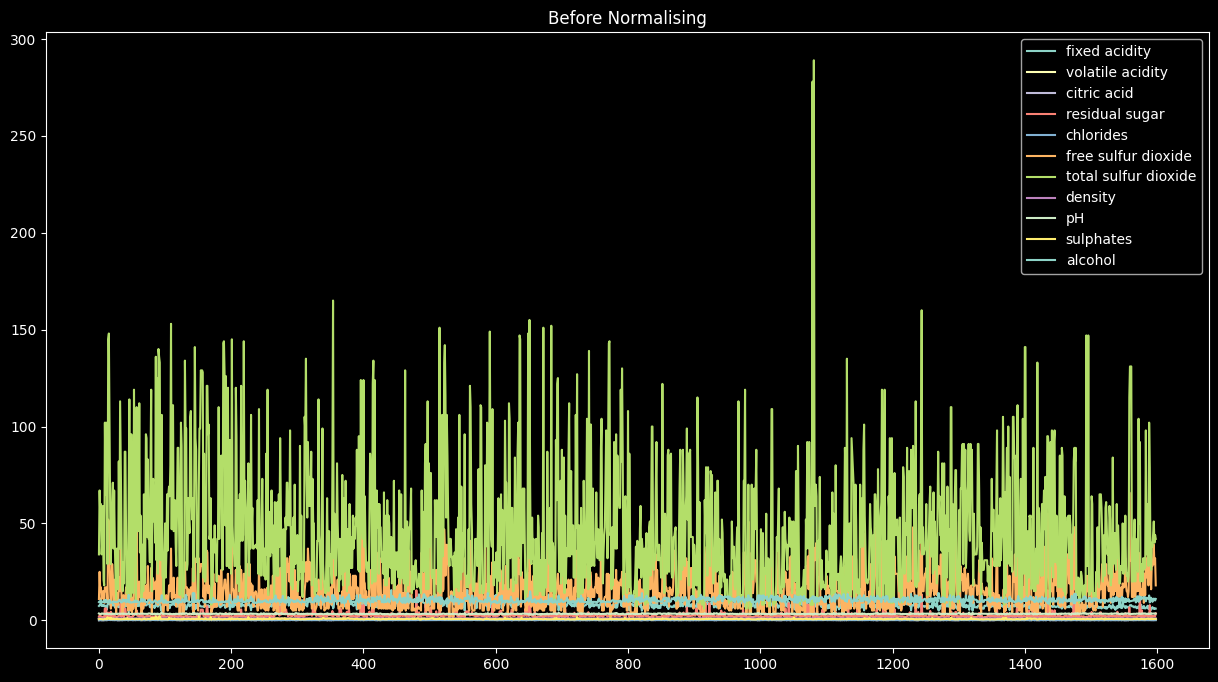

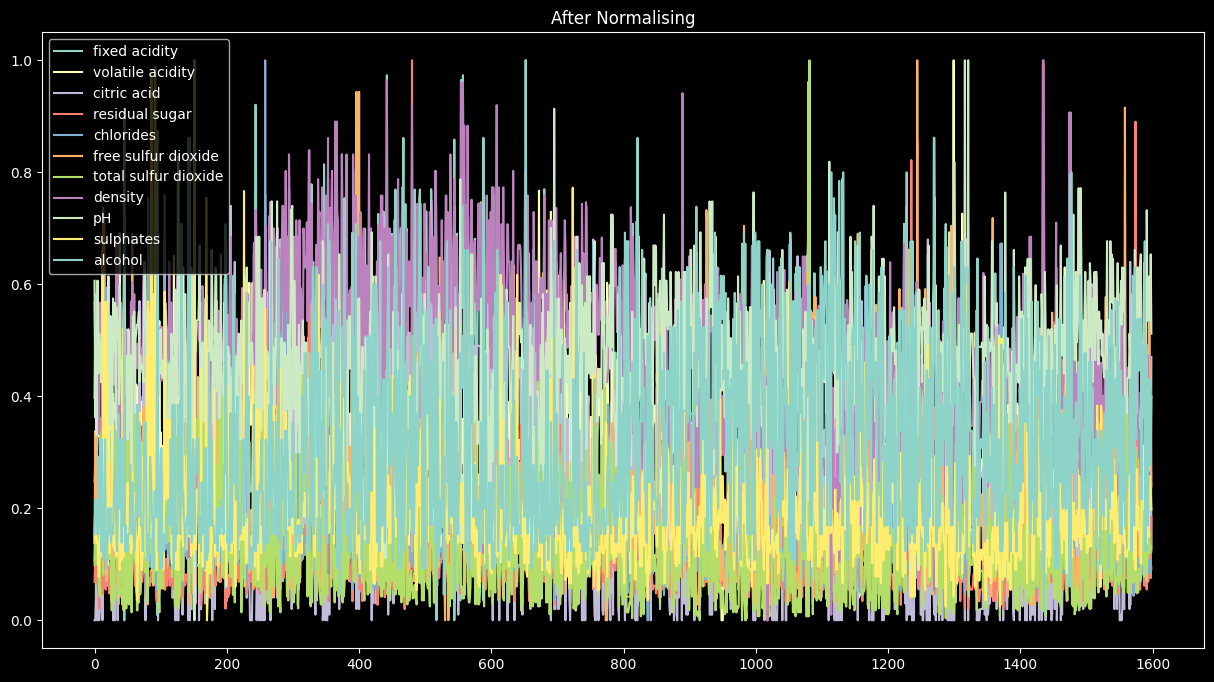

In [4]:
max_values = df.max(axis=0)
min_values = df.min(axis=0)

df_ = df.drop('Quality', axis =1)
df_.plot(title='Before Normalising', figsize=(15,8))

for idx, x in enumerate(df.columns):
    df[x] = (df[x] - min_values.iloc[idx]) / (max_values.iloc[idx] - min_values.iloc[idx])

df_ = df.drop('Quality', axis =1)

df_.plot(title='After Normalising', figsize=(15,8))
plt.show()

### Removing the outliers

limits are:
[[-0.05752212  0.68584071]
 [-0.07191781  0.6130137 ]
 [-0.405       0.915     ]
 [-0.00342466  0.18835616]
 [ 0.04674457  0.1803005 ]
 [-0.21126761  0.57746479]
 [-0.15547703  0.40989399]
 [ 0.15987518  0.81626285]
 [ 0.14566929  0.74409449]
 [-0.02994012  0.4011976 ]
 [-0.2         0.78461538]]


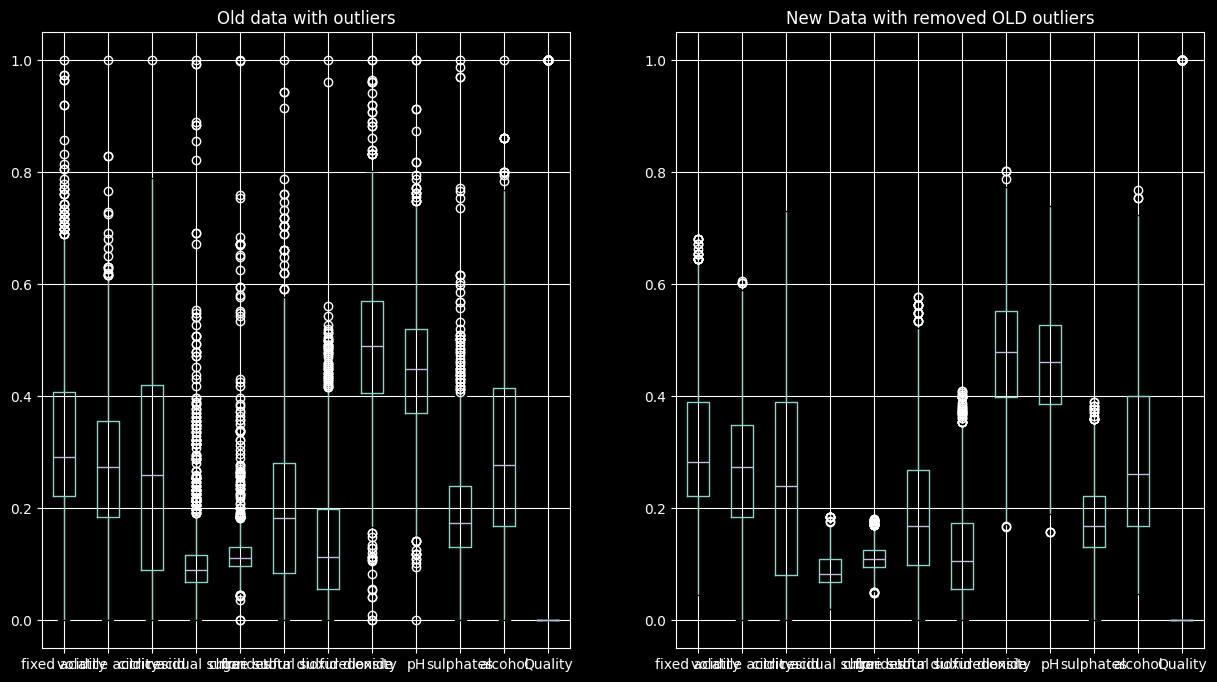

In [5]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.title('Old data with outliers')
df.boxplot()
# making np array to store limits
limits = np.zeros((len(df.columns) - 1, 2))
for idx,x in enumerate(df.columns):
    if x != 'Quality':
        Q1 = df[x].quantile(0.25)
        Q3 = df[x].quantile(0.75)
        IQR = Q3 - Q1
        limits[idx,0] = Q1 - 1.5*IQR
        limits[idx,1] = Q3 + 1.5*IQR
    # print(df[(df[x] < lower_limit) | (df[x] > upper_limit) ].to_string())
print(f'limits are:\n{limits}')

# removing rows with outliers
for i in df.index:
    column_idx = 0
    for j in df.columns:
        if j != 'Quality':
            if (df.loc[i,j] < limits[column_idx,0]) or (df.loc[i,j] > limits[column_idx, 1]):
                df.drop(i,inplace=True)
                break
            else:
                column_idx += 1
        
# print(df.to_string
plt.subplot(1,2,2)
plt.title('New Data with removed OLD outliers')
df.boxplot()
plt.show()

### Creating Correlation matrix

<Axes: >

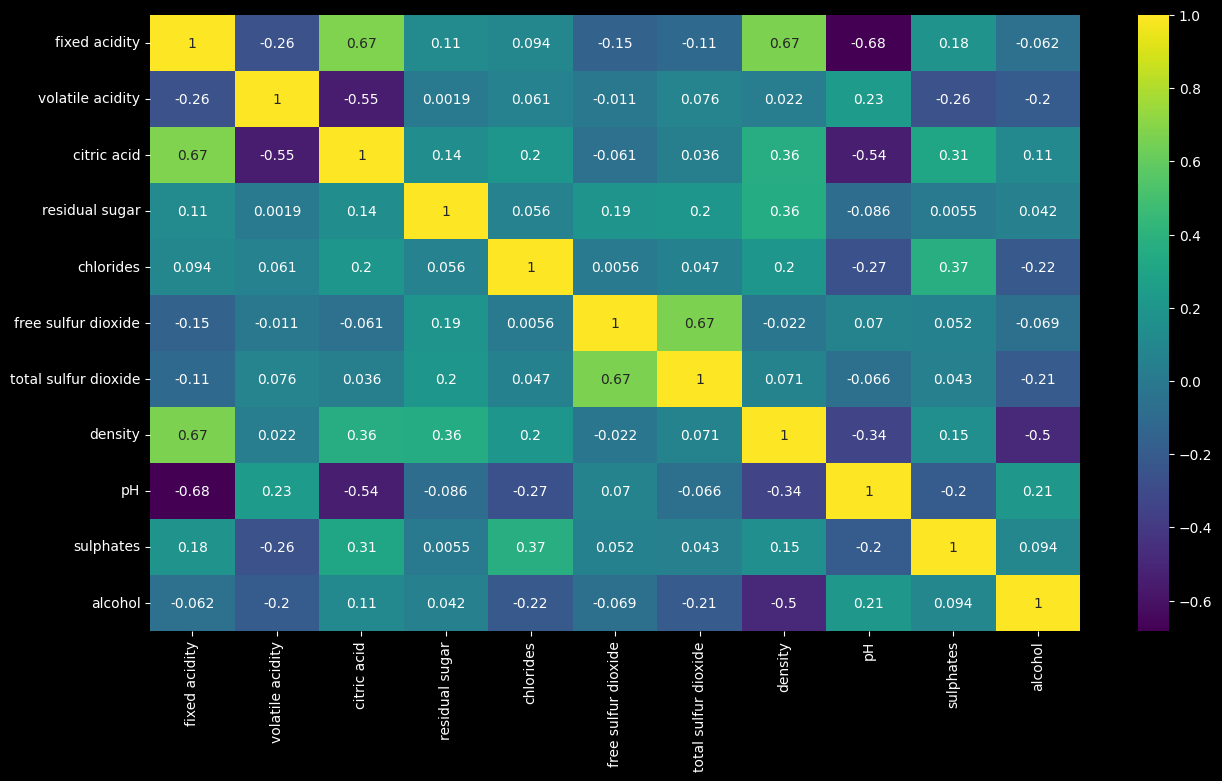

In [6]:
plt.figure(figsize=(15,8))
sns.heatmap(df_.corr(), cmap='viridis',annot=True)

### Splitting Data into train and test

In [7]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Quality', axis=1), df['Quality'], test_size=0.3, random_state=42)
# print(X_train.to_string())
# print("#"*20)
# print(X_test.to_string())
# print("#"*20)
# print(y_train.to_string())
# print("#"*20)
# print(y_test.to_string())

### Implementing Decision Tree

In [8]:
classifier = tree.DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [9]:
y_predicted = classifier.predict(X_test)

### Plotting original points and predicted ones

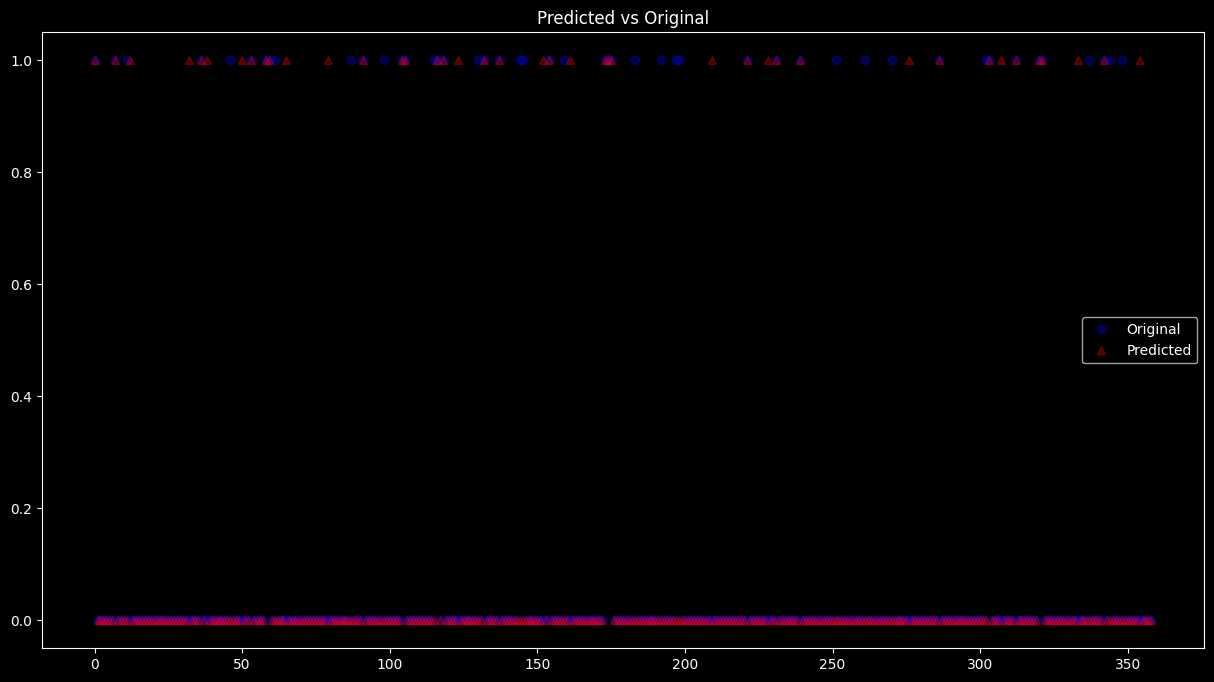

In [10]:
plt.figure(figsize=(15,8))
plt.title("Predicted vs Original")
plt.plot(np.array(y_test), 'bo', alpha=0.3)
plt.plot(y_predicted, 'r^', alpha=0.3)
plt.legend(('Original', 'Predicted'))
plt.show()

### Finding accuracy score

In [11]:
accuracy  = 0
y_test = np.array(y_test)
for x in range(len(y_predicted)):
    if y_predicted[x] == y_test[x]:
        accuracy+=1
accuracy /= len(y_predicted)
print("Accuracy from formula:", accuracy)

accuracy = accuracy_score(y_pred=y_predicted, y_true=y_test)
print("Accuracy from accuracy_score:", accuracy)

Accuracy from formula: 0.8997214484679665
Accuracy from accuracy_score: 0.8997214484679665


### Finding f1 score

### Finding f1 score

In [12]:
F1_score = f1_score(y_true=y_test, y_pred=y_predicted)
print("F1 Score from sklearn.metrics:", F1_score)

F1 Score from sklearn.metrics: 0.5909090909090909


### Implementing random forest classifier

In [13]:
classifier = RandomForestClassifier(n_estimators=100)
classifier.fit(X_train, y_train)
y_predicted = classifier.predict(X_test)

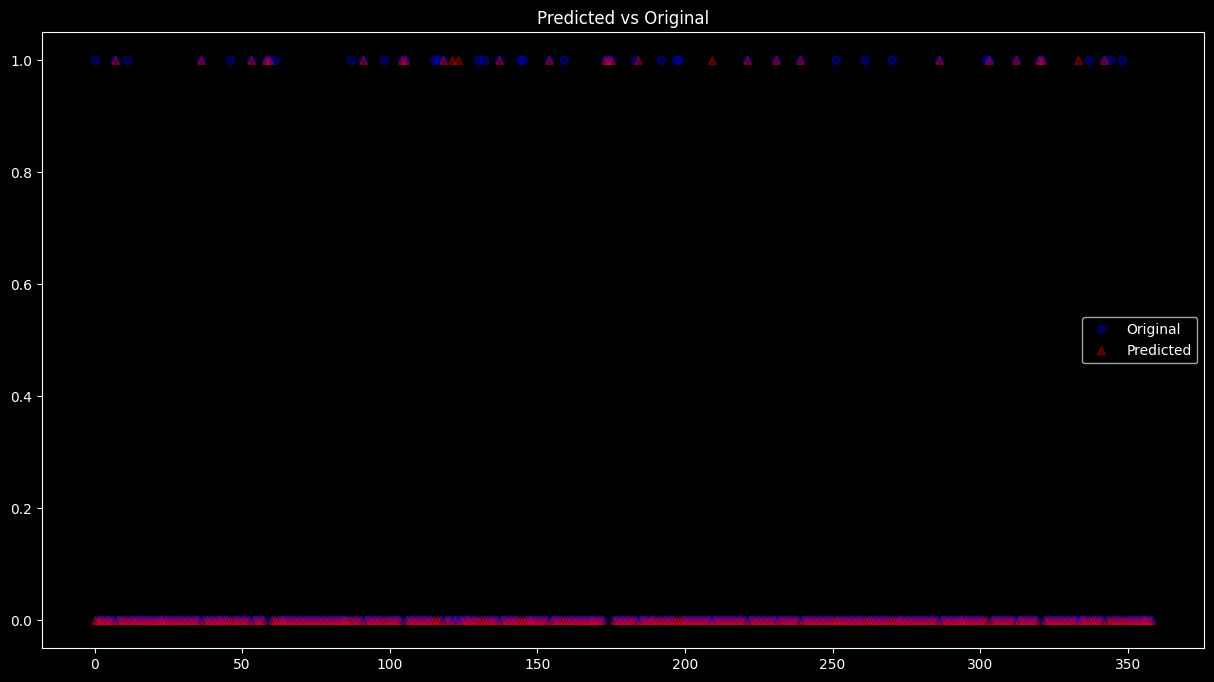

In [14]:
plt.figure(figsize=(15,8))
plt.title("Predicted vs Original")
plt.plot(y_test, 'bo', alpha=0.3)
plt.plot(y_predicted, 'r^', alpha=0.3)
plt.legend(('Original', 'Predicted'))
plt.show()

### Finding accuracy score

In [15]:
accuracy  = 0
y_test = np.array(y_test)
for x in range(len(y_predicted)):
    if y_predicted[x] == y_test[x]:
        accuracy+=1
accuracy /= len(y_predicted)
print("Accuracy from formula:", accuracy)

accuracy = accuracy_score(y_pred=y_predicted, y_true=y_test)
print("Accuracy from accuracy_score:", accuracy)

Accuracy from formula: 0.9192200557103064
Accuracy from accuracy_score: 0.9192200557103064


### Finding f1 score

In [16]:
F1_score = f1_score(y_true=y_test, y_pred=y_predicted)
print("F1 Score from sklearn.metrics:", F1_score)

F1 Score from sklearn.metrics: 0.6133333333333333
